In [63]:
import numpy as np
import pandas as pd
%matplotlib inline
!python --version
!pip3 install seaborn
import seaborn as sns

Python 3.4.6
    100% |████████████████████████████████| 184kB 4.9MB/s eta 0:00:01
    100% |████████████████████████████████| 16.6MB 89kB/s  eta 0:00:01
  Running setup.py bdist_wheel for seaborn ... done
  Stored in directory: /Users/ellieking/Library/Caches/pip/wheels/29/af/4b/ac6b04ec3e2da1a450e74c6a0e86ade83807b4aaf40466ecda
Successfully built seaborn


In [112]:
taxons = pd.read_csv('../../data/clean_taxons.csv')

NOTE: Consider way to move the top level taxon taxon_name to level1taxon if level1taxon is Nan. At the moment can't do this as would like becuase pensions is toplevel, yet also has parent = work. Think this might change in taxons data update so not going to spend time on it now.

In [3]:
content = pd.read_csv('../../data/clean_content.csv')

In [113]:
taxons = taxons[['base_path','content_id','taxon_name','level1taxon','level2taxon','level3taxon','level4taxon']]

### Hacky fix to remove the taxons that we don't want represented in training/test data

Take out all 'Imported' top taxons and World and Corporate

In [114]:
taxons.shape

(5517, 7)

In [115]:
taxons['level1taxon'] = taxons['level1taxon'].astype('str')
taxons = taxons[~taxons['level1taxon'].str.startswith("Imported")]
taxons = taxons[~taxons['taxon_name'].str.startswith("Imported")]
print("Taxons shape after deleting imported top taxons: {}".format(taxons.shape))
taxons = taxons[taxons.level1taxon != 'World']
taxons = taxons[taxons.taxon_name != 'World']
print("Taxons shape after deleting 'World' top taxons: {}".format(taxons.shape))
taxons = taxons[taxons.level1taxon != 'Corporate information']
taxons = taxons[taxons.taxon_name != 'Corporate information']
print("Taxons shape after deleting 'corporate information' top taxons: {}".format(taxons.shape))
taxons

Taxons shape after deleting imported top taxons: (4544, 7)
Taxons shape after deleting 'World' top taxons: (2042, 7)
Taxons shape after deleting 'corporate information' top taxons: (2041, 7)


,base_path,content_id,taxon_name,level1taxon,level2taxon,level3taxon,level4taxon
0,/business/taxon,495afdb6-47be-4df1-8b38-91c8adb1eefc,Business,nan,NaN,NaN,NaN
2,/crime-justice-and-law,ba951b09-5146-43be-87af-44075eac3ae9,"Crime, justice and law",nan,NaN,NaN,NaN
3,/defence,e491505c-77ae-45b2-84be-8c94b94f6a2b,Defence,nan,NaN,NaN,NaN
4,/childcare-parenting/entering-staying-uk,ba3a9702-da22-487f-86c1-8334a730e559,Entering and staying in the UK,nan,NaN,NaN,NaN
5,/environment,3cf97f69-84de-41ae-bc7b-7e2cc238fa58,Environment,nan,NaN,NaN,NaN
6,/going-and-being-abroad,9597c30a-605a-4e36-8bc1-47e5cdae41b3,Going and being abroad,nan,NaN,NaN,NaN
7,/government/taxon,e48ab80a-de80-4e83-bf59-26316856a5f9,Government,nan,NaN,NaN,NaN
8,/health-and-social-care,8124ead8-8ebc-4faf-88ad-dd5cbcc92ba8,Health and social care,nan,NaN,NaN,NaN
9,/housing-local-and-community,4794066e-e3cc-425e-8cc4-e7ff3edb4c39,"Housing, local and community",nan,NaN,NaN,NaN
14,/international,37d0fa26-abed-4c74-8835-b3b51ae1c8b2,International,nan,NaN,NaN,NaN


In [116]:
content_taxons = pd.merge(
    left=content, 
    right=taxons, 
    left_on='taxon_id', 
    right_on='content_id', 
    how='outer', 
    indicator=True
)

In [117]:
content_taxons.head()

,Unnamed: 0,base_path_x,content_id_x,description,details,document_type,first_published_at,locale,primary_publishing_organisation,publishing_app,...,variable,taxon_id,base_path_y,content_id_y,taxon_name,level1taxon,level2taxon,level3taxon,level4taxon,_merge
0,4.0,/bank-holidays,58f79dbd-e57f-4ab2-ae96-96df5767d1b2,,{},calendar,2016-02-29T09:24:10.000+00:00,en,NaN,calendars,...,0.0,ffeb8bc6-2cd3-4a73-ab76-072b9a1f95fb,/business/time-off,ffeb8bc6-2cd3-4a73-ab76-072b9a1f95fb,Statutory leave and time off,Business,Employing people,NaN,NaN,both
1,10.0,/calculate-your-holiday-entitlement,deedf6f8-389b-4b34-a5b1-faa9ef909a70,holiday calculator to work out statutory holid...,{'introductory_paragraph': '<p>Use this tool t...,transaction,2016-02-29T09:24:10.000+00:00,en,NaN,smartanswers,...,0.0,ffeb8bc6-2cd3-4a73-ab76-072b9a1f95fb,/business/time-off,ffeb8bc6-2cd3-4a73-ab76-072b9a1f95fb,Statutory leave and time off,Business,Employing people,NaN,NaN,both
2,78.0,/maternity-paternity-calculator,05d5412d-455b-485e-a570-020c9176a46e,calculate an employee’s maternity pay (smp) pa...,{'introductory_paragraph': '<p>Calculate your ...,transaction,2016-02-29T09:24:10.000+00:00,en,NaN,smartanswers,...,0.0,ffeb8bc6-2cd3-4a73-ab76-072b9a1f95fb,/business/time-off,ffeb8bc6-2cd3-4a73-ab76-072b9a1f95fb,Statutory leave and time off,Business,Employing people,NaN,NaN,both
3,95.0,/calculate-statutory-sick-pay,1c676a9e-0424-4ebb-bab8-d8cb8d2fc6f8,statutory sick pay (ssp) calculator - calculat...,{'introductory_paragraph': '<p>Calculate Statu...,transaction,2016-02-29T09:24:10.000+00:00,en,NaN,smartanswers,...,0.0,ffeb8bc6-2cd3-4a73-ab76-072b9a1f95fb,/business/time-off,ffeb8bc6-2cd3-4a73-ab76-072b9a1f95fb,Statutory leave and time off,Business,Employing people,NaN,NaN,both
4,201278.0,/training-study-work-your-rights,f50efa51-dc62-4111-aa59-731af77806aa,your rights to request time off for training o...,{'parts': [{'slug': 'who-can-and-cant-ask-for-...,guide,2016-02-29T09:24:10.000+00:00,en,NaN,publisher,...,0.0,ffeb8bc6-2cd3-4a73-ab76-072b9a1f95fb,/business/time-off,ffeb8bc6-2cd3-4a73-ab76-072b9a1f95fb,Statutory leave and time off,Business,Employing people,NaN,NaN,both


## Tidy up columns

In [118]:
content_taxons.columns

Index(['Unnamed: 0', 'base_path_x', 'content_id_x', 'description', 'details',
       'document_type', 'first_published_at', 'locale',
       'primary_publishing_organisation', 'publishing_app', 'title', 'body',
       'combined_text', 'variable', 'taxon_id', 'base_path_y', 'content_id_y',
       'taxon_name', 'level1taxon', 'level2taxon', 'level3taxon',
       'level4taxon', '_merge'],
      dtype='object')

In [119]:
content_taxons = content_taxons.drop(['Unnamed: 0', 'variable', 'base_path_y', 'content_id_y', 'details' ], axis=1)

In [120]:
content_taxons.rename(columns={'base_path_x': 'base_path', 'content_id_x': 'content_id'}, inplace=True)

## Training data: filter out rows which are duplicates, or mismatches from merge

In [126]:
print("There are {} rows in the data before filtering".format(content_taxons.shape[0]))
print("There are {} unique content items in the data before filtering".format(content_taxons.content_id.nunique()))
print("There are {} duplicates content items, both with matching content_id and taxon_id in the data before filtering".format(content_taxons[content_taxons.duplicated(['content_id', 'taxon_id'])].shape[0]))

There are 338917 rows in the data before filtering
There are 125968 unique content items in the data before filtering
There are 36870 duplicates content items, both with matching content_id and taxon_id in the data before filtering


In [127]:
content_taxons_filtered = content_taxons[content_taxons._merge == 'both']
print("There are {} rows in the taxon-level data after filtering out mismatches".format(content_taxons_filtered.shape[0]))
print("There are {} unique content items in the taxon-level data after filtering out mismatches".format(content_taxons_filtered.content_id.nunique()))

There are 232865 rows in the taxon-level data after filtering out mismatches
There are 114733 unique content items in the taxon-level data after filtering out mismatches


In [128]:
print("There were {} rows dropped because of mismatching".format(content_taxons.shape[0] - content_taxons_filtered.shape[0]))
print("There were {} unique content items dropped because of mismatching".format(content_taxons.content_id.nunique() - content_taxons_filtered.content_id.nunique()))

There were 106052 rows dropped because of mismatching
There were 11235 unique content items dropped because of mismatching


In [129]:
print("There are {} duplicates content items, both with matching content_id and taxon_id in after removing mismatches".format(content_taxons_filtered[content_taxons_filtered.duplicated(['content_id', 'taxon_id'])].shape[0]))

There are 25502 duplicates content items, both with matching content_id and taxon_id in after removing mismatches


In [130]:
content_taxons_dedup = content_taxons_filtered.drop_duplicates(subset = ['content_id', 'taxon_id'])

In [131]:
content_taxons_filtered.drop_duplicates(subset = ['content_id', 'taxon_id'])

,base_path,content_id,description,document_type,first_published_at,locale,primary_publishing_organisation,publishing_app,title,body,combined_text,taxon_id,taxon_name,level1taxon,level2taxon,level3taxon,level4taxon,_merge
0,/bank-holidays,58f79dbd-e57f-4ab2-ae96-96df5767d1b2,,calendar,2016-02-29T09:24:10.000+00:00,en,NaN,calendars,uk bank holidays,,uk bank holidays,ffeb8bc6-2cd3-4a73-ab76-072b9a1f95fb,Statutory leave and time off,Business,Employing people,NaN,NaN,both
1,/calculate-your-holiday-entitlement,deedf6f8-389b-4b34-a5b1-faa9ef909a70,holiday calculator to work out statutory holid...,transaction,2016-02-29T09:24:10.000+00:00,en,NaN,smartanswers,calculate holiday entitlement,,calculate holiday entitlement holiday calculat...,ffeb8bc6-2cd3-4a73-ab76-072b9a1f95fb,Statutory leave and time off,Business,Employing people,NaN,NaN,both
2,/maternity-paternity-calculator,05d5412d-455b-485e-a570-020c9176a46e,calculate an employee’s maternity pay (smp) pa...,transaction,2016-02-29T09:24:10.000+00:00,en,NaN,smartanswers,maternity adoption and paternity calculator fo...,,maternity adoption and paternity calculator fo...,ffeb8bc6-2cd3-4a73-ab76-072b9a1f95fb,Statutory leave and time off,Business,Employing people,NaN,NaN,both
3,/calculate-statutory-sick-pay,1c676a9e-0424-4ebb-bab8-d8cb8d2fc6f8,statutory sick pay (ssp) calculator - calculat...,transaction,2016-02-29T09:24:10.000+00:00,en,NaN,smartanswers,calculate your employee's statutory sick pay,,calculate your employee's statutory sick pay s...,ffeb8bc6-2cd3-4a73-ab76-072b9a1f95fb,Statutory leave and time off,Business,Employing people,NaN,NaN,both
4,/training-study-work-your-rights,f50efa51-dc62-4111-aa59-731af77806aa,your rights to request time off for training o...,guide,2016-02-29T09:24:10.000+00:00,en,NaN,publisher,training and study at work: your rights,,training and study at work: your rights your r...,ffeb8bc6-2cd3-4a73-ab76-072b9a1f95fb,Statutory leave and time off,Business,Employing people,NaN,NaN,both
5,/giving-staff-time-off-jury-service,a4fa57a8-8a70-4b66-a7ba-22f5103b6378,what you can do if an employee is called up fo...,guide,2016-02-29T09:24:10.000+00:00,en,NaN,publisher,giving staff time off for jury service,,giving staff time off for jury service what yo...,ffeb8bc6-2cd3-4a73-ab76-072b9a1f95fb,Statutory leave and time off,Business,Employing people,NaN,NaN,both
6,/employers-sick-pay,0374ee58-fd10-4e16-840e-cdaf6bbd2955,employer guide to statutory sick pay - ssp rat...,guide,2016-02-29T09:24:10.000+00:00,en,NaN,publisher,statutory sick pay (ssp): employer guide,,statutory sick pay (ssp): employer guide emplo...,ffeb8bc6-2cd3-4a73-ab76-072b9a1f95fb,Statutory leave and time off,Business,Employing people,NaN,NaN,both
7,/recover-statutory-payments,abfde1c2-1e08-4eb0-98a4-2d2f65ba2016,reclaim statutory maternity paternity adoption...,guide,2016-02-29T09:24:10.000+00:00,en,NaN,publisher,get financial help with statutory pay,,get financial help with statutory pay reclaim ...,ffeb8bc6-2cd3-4a73-ab76-072b9a1f95fb,Statutory leave and time off,Business,Employing people,NaN,NaN,both
8,/giving-staff-time-off-for-magistrate-duty,1e8c3bb8-2a63-46d5-9776-f0d3feed034e,how to give an employee time off to volunteer ...,answer,2016-02-29T09:24:10.000+00:00,en,NaN,publisher,giving staff time off for magistrate duty,you must by law allow an employee who is a mag...,giving staff time off for magistrate duty how ...,ffeb8bc6-2cd3-4a73-ab76-072b9a1f95fb,Statutory leave and time off,Business,Employing people,NaN,NaN,both
9,/career-breaks,e1b8002b-a82c-4e03-8cff-02db4ab06b58,career breaks - eligibility and notice periods...,answer,2016-02-29T09:24:10.000+00:00,en,NaN,publisher,career breaks,there are no laws that deal specifically with ...,career breaks career breaks - eligibility and ...,ffeb8bc6-2cd3-4a73-ab76-072b9a1f95fb,Statutory leave and time off,Business,Employing people,NaN,NaN,both


In [132]:
print("There were {} additional rows dropped due to duplicate content_id/taxon_id combination".format(content_taxons_filtered.shape[0] - content_taxons_dedup.shape[0]))
print("There were {} additional content items dropped due to duplicate content_id/taxon_id combination".format(content_taxons_filtered.content_id.nunique() - content_taxons_dedup.content_id.nunique()))

There were 25502 additional rows dropped due to duplicate content_id/taxon_id combination
There were 0 additional content items dropped due to duplicate content_id/taxon_id combination


## Top level taxons

Expecting 20 top taxons

In [134]:
print("There are {} unique taxon names in the level 1 taxon".format(content_taxons_dedup.level1taxon.nunique()))

There are 20 unique taxon names in the level 1 taxon


In [135]:
topfreq = content_taxons_dedup.groupby('level1taxon').size()
topfreq

level1taxon
Business                                         43530
Crime, justice and law                            2811
Defence                                           3969
Education, training and skills                    9128
Entering and staying in the UK                     293
Environment                                      21299
Going and being abroad                            1648
Government                                       21223
Health and social care                           13935
Housing, local and community                      9929
International                                    11440
Life circumstances                                 240
Money                                             5672
Parenting, childcare and children's services      1010
Regional and local government                     7825
Society and culture                              13254
Transport                                         7759
Welfare                                            29

#### Lookout! Notice the nans in there resulting from the hacky removal of toptaxons. ONly sort this out if it remains a problem after data update when the hacky fix should be deleted.

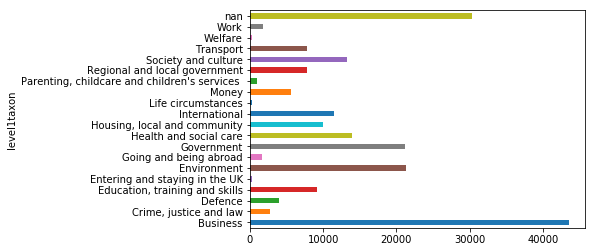

In [136]:
topfreq.plot(kind = 'barh')

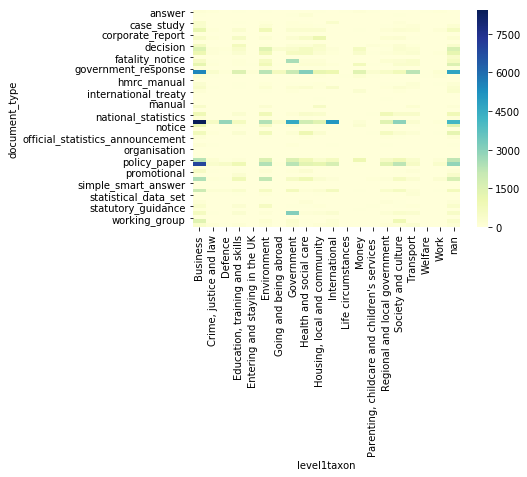

In [137]:
top_doctype = pd.crosstab(content_taxons_dedup['document_type'], content_taxons_dedup['level1taxon'])
sns.heatmap(top_doctype, cmap = "YlGnBu")

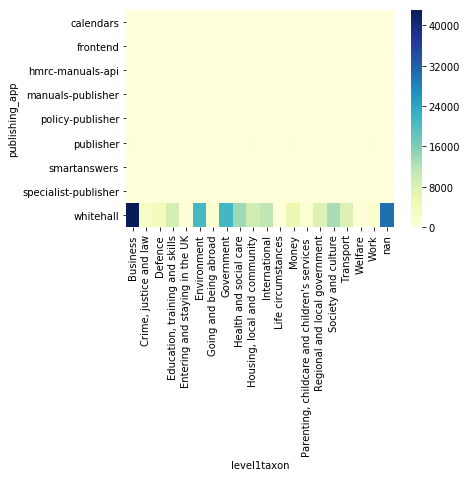

In [138]:
top_pubapp = pd.crosstab(content_taxons_dedup['publishing_app'], content_taxons_dedup['level1taxon'])
sns.heatmap(top_pubapp, cmap = "YlGnBu")

In [139]:
pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])

,a,b,c,d
0,0.999256,0.708587,0.409130,0.754595
1,0.156814,0.438527,0.890919,0.366073
2,0.304134,0.205203,0.233163,0.146295
3,0.961569,0.586922,0.190516,0.829684
4,0.509380,0.071177,0.548125,0.587436
5,0.315635,0.441868,0.199591,0.252055
6,0.714863,0.578476,0.060881,0.499922
7,0.708998,0.160711,0.956129,0.886933
8,0.198242,0.479204,0.707315,0.505388
9,0.520589,0.350061,0.953359,0.085956


In [140]:
content_taxons_dedup.groupby('level1taxon').size()

level1taxon
Business                                         43530
Crime, justice and law                            2811
Defence                                           3969
Education, training and skills                    9128
Entering and staying in the UK                     293
Environment                                      21299
Going and being abroad                            1648
Government                                       21223
Health and social care                           13935
Housing, local and community                      9929
International                                    11440
Life circumstances                                 240
Money                                             5672
Parenting, childcare and children's services      1010
Regional and local government                     7825
Society and culture                              13254
Transport                                         7759
Welfare                                            29

### Level 2 taxons

In [142]:
print("There are {} unique taxon names in the level 2 taxon".format(content_taxons_dedup.level2taxon.nunique()))

There are 102 unique taxon names in the level 2 taxon


In [143]:
second_freq = content_taxons_dedup.groupby('level2taxon').size()
second_freq

level2taxon
Adoption, fostering and surrogacy                                           67
Arts and culture                                                           736
Asylum                                                                      21
Aviation                                                                   246
Brexit and the EU                                                           10
British nationals overseas                                                 276
Business and enterprise                                                   3386
Business and the environment                                              1496
Business tax                                                              2314
Child Benefit                                                              112
Childcare and early years                                                  197
Children's health and welfare                                               47
Climate change and energy               

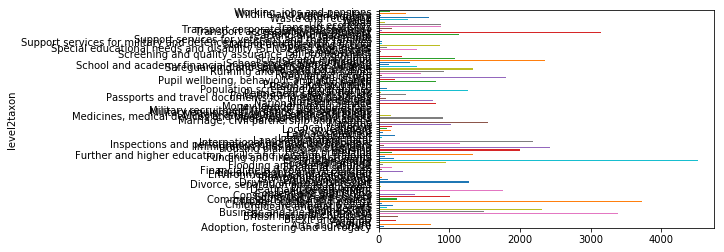

In [144]:
second_freq.plot(kind = 'barh')

## Checking that all items tagged to lower level have a label in toptaxon and secondtaxon

In [64]:
level1_2 = pd.crosstab(content_taxons_dedup['level1taxon'], content_taxons_dedup['level2taxon'])

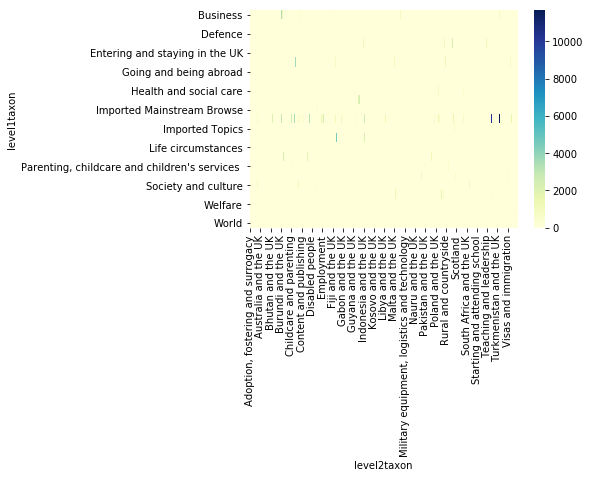

In [66]:
sns.heatmap(level1_2, cmap = "YlGnBu")